In [2]:
% cd /home/mayu-ot/durga/Experiments/loc_iparaphrasing/

/home/mayu-ot/durga/Experiments/loc_iparaphrasing


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import tables

In [6]:
from chainercv.utils import bbox_iou
from chainercv.visualizations import vis_bbox
import imageio

In [7]:
import random

In [5]:
roi_data = tables.open_file('data/region_feat/cca/roi_test.h5')
gt_roi_data = pd.read_csv('data/gt_roi_cord_test.csv')
data = pd.read_csv('data/phrase_pair_test.csv')

In [9]:
i = np.random.randint(len(data))
anno = data[i]

phrase1 = anno['phrase1']
phrase2 = anno['phrase2']

70965

In [26]:
node = roi_data.get_node('/', '460195978')
rois = node.read()
gt_roi = gt_roi_data[(gt_roi_data.image == 460195978) & (gt_roi_data.org_phrase == 'a dog')].loc[:, [ 'xmin', 'ymin', 'xmax', 'ymax']]
gt_roi = np.asarray(gt_roi)

In [27]:
gt_weight = bbox_iou(rois, gt_roi)
gt_weight = np.exp(gt_weight) / np.sum(np.exp(gt_weight))

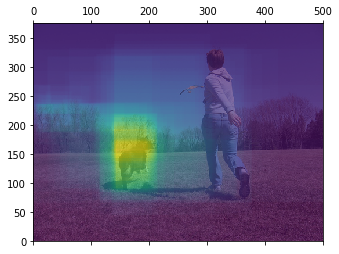

In [28]:
im = imageio.imread('/home/mayu-ot/Data/Dataset/Flickr30kEntities/flickr30k-images/460195978.jpg')
H, W, _ = im.shape
focus = np.zeros((im.shape[:2]))

for r, w in zip(rois, gt_weight):
    xmin, ymin, xmax, ymax = r
    focus[ymin:ymax, xmin:xmax] += w
    
plt.imshow(im, extent=(0, W, 0, H))
plt.gca().matshow(focus, alpha=.7, extent=(0, W, 0, H))

In [33]:
xmin, ymin, xmax, ymax = gt_roi[0]
gt_map = np.zeros_like(focus)
gt_map[ymin:ymax, xmin:xmax] = 1

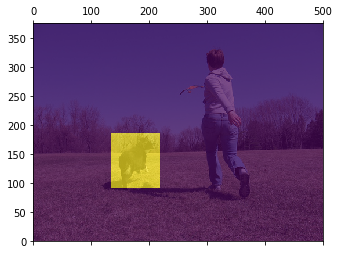

In [35]:
plt.imshow(im, extent=(0, W, 0, H))
plt.gca().matshow(gt_map, alpha=.7, extent=(0, W, 0, H))